## Spike's blood glucose log

In [1]:
%pylab nbagg
import datetime 
import matplotlib.dates as mdates

Populating the interactive namespace from numpy and matplotlib


In [2]:
entries = np.array([[datetime.datetime(year=2018, month=10, day=31,hour=8,minute=5),\
                    datetime.datetime(year=2018, month=10, day=31,hour=10,minute=14),\
                    datetime.datetime(year=2018, month=10, day=31,hour=12,minute=23),\
                    datetime.datetime(year=2018, month=10, day=31,hour=14,minute=32),\
                    datetime.datetime(year=2018, month=10, day=31,hour=16,minute=53),\
                     datetime.datetime(year=2018, month=10, day=31,hour=18,minute=25),\
                     datetime.datetime(year=2018, month=10, day=31,hour=19,minute=21)],\
                    [600,586,607,421,646,351,577]])

#frist entry is "HI" or >40 so I replace it with 40 after the conversion below

In [3]:
# convert mg/dL to mmol/L
#x = 564
#x1 = (x/1e3)*1e1 #g/L
#x1= x1/.180156 #g/mmol*L div molar mass of glucose in mmol
#print(x1)

for i in range(len(entries[1])):
    entries[1][i] = (entries[1][i]/1e2)/.180156
entries[1][0]=40    
print(entries)

[[datetime.datetime(2018, 10, 31, 8, 5)
  datetime.datetime(2018, 10, 31, 10, 14)
  datetime.datetime(2018, 10, 31, 12, 23)
  datetime.datetime(2018, 10, 31, 14, 32)
  datetime.datetime(2018, 10, 31, 16, 53)
  datetime.datetime(2018, 10, 31, 18, 25)
  datetime.datetime(2018, 10, 31, 19, 21)]
 [40 32.527365172406135 33.69302160349919 23.368636070960722
  35.857812118386285 19.483114633983877 32.02779813050911]]


In [4]:
times = []
safe1 = []
ideal1 = []
ideal2 = []

for i in range(0,12):
    times.append(datetime.datetime(year=2018, month=10, day=31,hour=1))
    safe1.append(3.6)
    ideal1.append(16.7)
    ideal2.append(5.6) 

In [5]:
x = mdates.date2num(entries[0])

z4 = np.polyfit(x, entries[1], 2)
p4 = np.poly1d(z4)

<IPython.core.display.Javascript object>


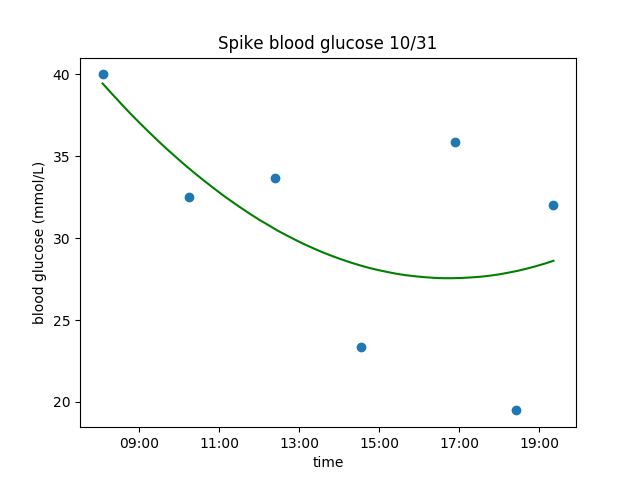

[ 736998.33680556  736998.34638605  736998.35596655  736998.36554705
  736998.37512755  736998.38470805  736998.39428855  736998.40386905
  736998.41344955  736998.42303005  736998.43261054  736998.44219104
  736998.45177154  736998.46135204  736998.47093254  736998.48051304
  736998.49009354  736998.49967404  736998.50925454  736998.51883503
  736998.52841553  736998.53799603  736998.54757653  736998.55715703
  736998.56673753  736998.57631803  736998.58589853  736998.59547902
  736998.60505952  736998.61464002  736998.62422052  736998.63380102
  736998.64338152  736998.65296202  736998.66254252  736998.67212302
  736998.68170351  736998.69128401  736998.70086451  736998.71044501
  736998.72002551  736998.72960601  736998.73918651  736998.74876701
  736998.75834751  736998.767928    736998.7775085   736998.787089
  736998.7966695   736998.80625   ]


In [13]:
fig, ax = plt.subplots()
xx = np.linspace(x.min(), x.max(), 50)
print(xx)
dd = mdates.num2date(xx)
#dd1 = mdates.num2date(1,24)

#plt.plot(safe1,dd1,'r')
plt.plot(dd, p4(xx), '-g')
matplotlib.pyplot.plot_date(entries[0],entries[1])
#plt.gcf().autofmt_xdate()
plt.title('Spike blood glucose 10/31')
plt.ylabel('blood glucose (mmol/L)')
plt.xlabel('time')
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.savefig('spike1.png')